# Sahar Tosif Jamal  --------------------  The Sparks Foundation
## Task 1: Predicting Student's marks on the basis of Hours studied
Completed on 4th November 2020

### Step 1: Reading the Dataset

In [1]:
# Importing all libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data imported")
data.head(10)

Data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.shape

(25, 2)

This means that there are 25 rows and 2 columns in the dataset

In [4]:
print("Summary of the Dataset")
data.describe()

Summary of the Dataset


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Step 2: Plotting

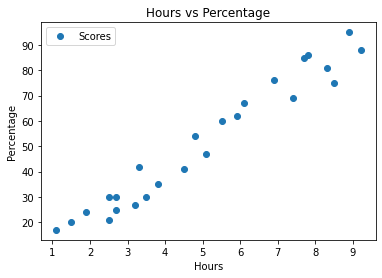

In [5]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours')  
plt.ylabel('Percentage')  
plt.show()

The graph represents that our dataset is postively Linear.

### Step 3: Preparing the Data
Dividing into Attributes(X) and Labels(Y) where X is the __dependent variable__ and Y is the __independent variable__.

In [6]:
x = data.iloc[:, :-1].values
y = data.iloc[:,-1].values

### Step 4: Training the Data

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train.reshape(-1,1), y_train)
print("Trained!.")

Trained!.


In [8]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print("Intercept: ",regressor.intercept_)
print("Slope: ",regressor.coef_)

Intercept:  2.018160041434683
Slope:  [9.91065648]


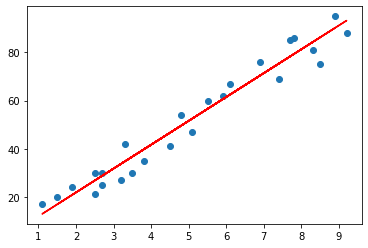

In [9]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x, y)
plt.plot(x, line, color='Red');
plt.show()

### Step 5: Prediction

In [10]:
y_pred=regressor.predict(x_test)
df=pd.DataFrame({'Actual Marks':y_test,'Predicted':y_pred})
df

,Actual Marks,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Comparing Actual Marks and Predicted Values

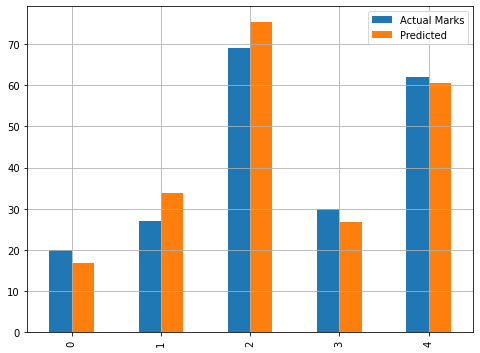

In [11]:
#Bar Graph
df.plot(kind='bar', figsize=(8,6))
plt.grid()
plt.show()

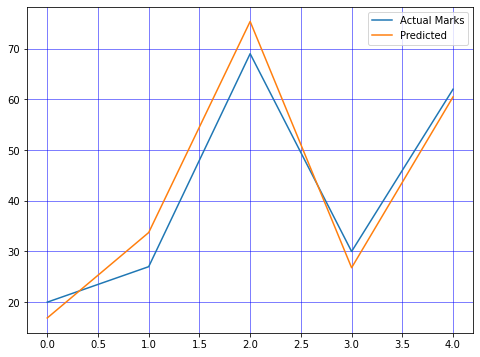

In [12]:
#Line graph
df.plot(kind='line', figsize=(8,6))
plt.grid(which='major', linewidth='0.5', color = 'red')
plt.grid(which='major', linewidth='0.5', color = 'blue')
plt.show()

As you can see there is not much difference between the actual scores and the predicted score.

### Step 6: Testing on another data

In [13]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
pre_sc = regressor.predict(test)
print("Hours Studied = {}".format(hours))
print("Predicted Score = {}".format(pre_sc[0]))

Hours Studied = 9.25
Predicted Score = 93.69173248737538


### Step 7: Evaluating our Model

In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r^2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root mean squared Error: 4.6474476121003665
r^2: 0.9454906892105356


### Step 8: Conclusion

__Mean Absolute Error__ of a model with respect to a test set is the mean of the absolute values of the individual prediction errors on over all instances in the test set.

__Mean Squared Error__ is the most intuitive numerical measure that tells how good our model is. The Square Error increases as the targets get furher away from the predicted points/line.
Here its 21.5987693072174 which is still good as it is not far away from 0.

__Root Mean Square Error__ is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

__R-Squared__ is suggested to be greater than or equal to 0.10. Here it is 0.9454906892105356 which is still strong linear relationship.

## Thank You!